In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import seaborn as sns

plt.style.use('ggplot')
sns.set(style='darkgrid')
green = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
orange = (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

In [2]:
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

In [3]:
df = df.drop(['PHONE', 'Community Board', 'Council District', 'BIN', 'BBL', 'NTA'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400120 entries, 0 to 400119
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  400120 non-null  int64  
 1   DBA                    399497 non-null  object 
 2   BORO                   400120 non-null  object 
 3   BUILDING               398885 non-null  object 
 4   STREET                 400037 non-null  object 
 5   ZIPCODE                393396 non-null  float64
 6   CUISINE DESCRIPTION    400120 non-null  object 
 7   INSPECTION DATE        400120 non-null  object 
 8   ACTION                 397462 non-null  object 
 9   VIOLATION CODE         393178 non-null  object 
 10  VIOLATION DESCRIPTION  389808 non-null  object 
 11  CRITICAL FLAG          389808 non-null  object 
 12  SCORE                  382086 non-null  float64
 13  GRADE                  202272 non-null  object 
 14  GRADE DATE             199744 non-nu

* __CAMIS__ - unique identifier for the restaurant, 10-digit integer
* __DBA__ - Doing Business As, Public business name
* __BORO__ - Borough of location
* __BUILDING, STREET, ZIPCODE__ - Building number, Street name for establishment, Zipcode
* __CUISINE DESCRIPTION__ - Type of restaurant cuisine
* __INSPECTION DATE__ - Date of Inspection. Establishments with inspection date of 1/1/1900 are new establishments that have not yet received an inspection.
* __ACTION__ - Action associated with each inspection:
 * Violations were cited in the following area(s).
 * No violations were recorded at the time of this inspection.
 * Establishment re-opened by DOHMH
 * Establishment re-closed by DOHMH
 * Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.
 * "Missing" = not yet inspected
* __VIOLATION CODE__ - Alphanumeric code assoc. w/ Violation
* __VIOLATION DESCRIPTION__ - Description of violation
* __CRITICAL FLAG__ - Critical, Not Critical, N/A. (Critical violations are those most likely to contribute to foodborne illness)
* __SCORE__ - Total score for an inspection. __Higher is worse!__
* __GRADE__ - Grade assoc. with the inspection. (A, B, C, N, Z, P)
* __GRADE DATE__ - Date when grade was issued to restaurant
* __RECORD DATE__ - Date when record was added to dataset (data updated daily)
* __INSPECTION TYPE__ - Inspection program and Type of inspection performed.
* __Latitude / Longitude__

Project + Presentation Format:
1. Background, Data sources
2. Exploratory data analysis, cleaning, visualizations
    * Distributions of grades, scores, violations
    * Grade distribution is the same among all boroughs
    * Geo map with Folium
3. Hypothesis, Correlation analysis
    * Questions
    * Is there a relationship between wealth/median income of a neighborhood and inspection grades & scores?
    * Do violations follow an "outbreak" type of pattern? E.g. are similar violations geo-clustered together?


### __Determine dataset spanning what years, and decide which years to use__

In [5]:
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Census Tract
0,50040890,SOUVLAKI GR MIDTOWN,Manhattan,162,WEST 56 STREET,10019.0,Greek,07/11/2018,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,N,12.0,A,07/11/2018,10/25/2020,Cycle Inspection / Re-inspection,40.764564,-73.979892,13700.0
1,50051814,CORK & KALE AT EVEN HOTEL,Brooklyn,46,NEVINS STREET,11217.0,American,04/02/2019,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,10.0,A,04/02/2019,10/25/2020,Cycle Inspection / Initial Inspection,40.687420,-73.981762,3700.0
2,40365882,NEW YORK PIZZA SUPREMA,Manhattan,413,8 AVENUE,10001.0,Pizza,07/20/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,13.0,A,07/20/2018,10/25/2020,Cycle Inspection / Re-inspection,40.750032,-73.995041,10300.0
3,41567472,AMC THEATRES,Manhattan,234,WEST 42 STREET,10036.0,American,05/18/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,12.0,A,05/18/2019,10/25/2020,Cycle Inspection / Initial Inspection,40.756740,-73.988659,11300.0
4,50053535,MEO JAPANESE HIBACHI,Queens,185-01,UNION TURNPIKE,11366.0,Japanese,06/19/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,44.0,C,06/19/2019,10/25/2020,Cycle Inspection / Re-inspection,40.728310,-73.783924,133300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400115,41714341,PLANET HOLLYWOOD,Brooklyn,1540,BROADWAY,11221.0,American,02/06/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,20.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.686254,-73.916402,37300.0
400116,50017941,CHEZ ALEX,Brooklyn,72,RALPH AVENUE,11221.0,Café/Coffee/Tea,05/23/2018,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,13.0,A,05/23/2018,10/25/2020,Cycle Inspection / Initial Inspection,40.687538,-73.923648,38500.0
400117,50083708,COUSINS MAINE LOBSTER,Manhattan,77,LEXINGTON AVENUE,10010.0,Seafood,09/24/2019,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,12.0,A,09/24/2019,10/25/2020,Cycle Inspection / Re-inspection,40.741308,-73.983418,6800.0
400118,41570817,PATZERIA FAMILY & FRIENDS,Manhattan,311,WEST 48 STREET,10036.0,Italian,01/14/2020,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,12.0,A,01/14/2020,10/25/2020,Cycle Inspection / Initial Inspection,40.761301,-73.987640,12700.0


In [6]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

In [7]:
df.groupby(df['INSPECTION DATE'].dt.year)['INSPECTION DATE'].count()

INSPECTION DATE
1900      2658
2012        11
2013        12
2014        38
2015       129
2016     17876
2017     78854
2018    120820
2019    147542
2020     32180
Name: INSPECTION DATE, dtype: int64

* The dataset consists of 400K rows. Almost 75% of the records lie in the years 2017-2019, so we will only look at those years for now. 2020 is not yet over and there is a significant dropoff in records for 2020, certainly due to the pandemic shutting down restaurants.

In [8]:
trim = df.loc[df['INSPECTION DATE'].dt.year.isin([2017, 2018, 2019])]

In [9]:
trim

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Census Tract
0,50040890,SOUVLAKI GR MIDTOWN,Manhattan,162,WEST 56 STREET,10019.0,Greek,2018-07-11,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,N,12.0,A,07/11/2018,10/25/2020,Cycle Inspection / Re-inspection,40.764564,-73.979892,13700.0
1,50051814,CORK & KALE AT EVEN HOTEL,Brooklyn,46,NEVINS STREET,11217.0,American,2019-04-02,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,10.0,A,04/02/2019,10/25/2020,Cycle Inspection / Initial Inspection,40.687420,-73.981762,3700.0
2,40365882,NEW YORK PIZZA SUPREMA,Manhattan,413,8 AVENUE,10001.0,Pizza,2018-07-20,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,13.0,A,07/20/2018,10/25/2020,Cycle Inspection / Re-inspection,40.750032,-73.995041,10300.0
3,41567472,AMC THEATRES,Manhattan,234,WEST 42 STREET,10036.0,American,2019-05-18,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,12.0,A,05/18/2019,10/25/2020,Cycle Inspection / Initial Inspection,40.756740,-73.988659,11300.0
4,50053535,MEO JAPANESE HIBACHI,Queens,185-01,UNION TURNPIKE,11366.0,Japanese,2019-06-19,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,44.0,C,06/19/2019,10/25/2020,Cycle Inspection / Re-inspection,40.728310,-73.783924,133300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400114,41636259,DIDI WORLD FAMOUS FOOD,Brooklyn,2972,AVENUE U,11229.0,Chinese,2017-01-04,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,11.0,A,01/04/2017,10/25/2020,Cycle Inspection / Initial Inspection,40.600610,-73.940103,57000.0
400115,41714341,PLANET HOLLYWOOD,Brooklyn,1540,BROADWAY,11221.0,American,2017-02-06,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,20.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.686254,-73.916402,37300.0
400116,50017941,CHEZ ALEX,Brooklyn,72,RALPH AVENUE,11221.0,Café/Coffee/Tea,2018-05-23,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Y,13.0,A,05/23/2018,10/25/2020,Cycle Inspection / Initial Inspection,40.687538,-73.923648,38500.0
400117,50083708,COUSINS MAINE LOBSTER,Manhattan,77,LEXINGTON AVENUE,10010.0,Seafood,2019-09-24,Violations were cited in the following area(s).,10I,"Single service item reused, improperly stored,...",N,12.0,A,09/24/2019,10/25/2020,Cycle Inspection / Re-inspection,40.741308,-73.983418,6800.0


### __Let's compare distribution of Grades across the 5 boroughs__

In [10]:
boros = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [11]:
borograde = trim[['BORO', 'GRADE']]

In [12]:
borograde = borograde[borograde.BORO != '0']

In [13]:
borograde = borograde[borograde.GRADE.isin(['A', 'B', 'C'])]

In [14]:
ct = pd.crosstab(borograde.BORO, borograde.GRADE).sort_values(by = 'A',ascending=False)

In [15]:
ct

GRADE,A,B,C
BORO,,,
Manhattan,55144,8732,3537
Brooklyn,35195,5981,2125
Queens,32276,5184,1960
Bronx,12522,2541,975
Staten Island,4837,768,242


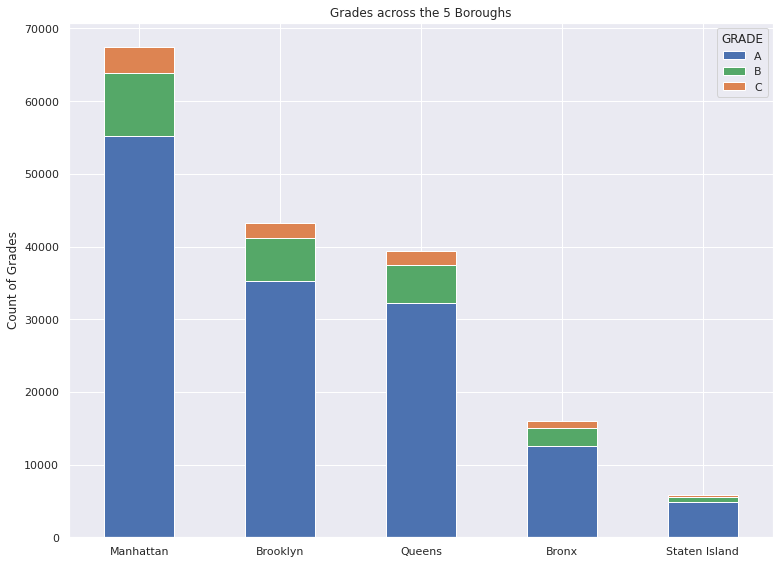

In [16]:
ct.plot(kind = 'bar', stacked=True, figsize=(11, 8), color=['b', green, orange])
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Count of Grades')
plt.title('Grades across the 5 Boroughs')

plt.tight_layout()
# plt.savefig('img/borosgrades.png')
plt.show()

In [17]:
ctdensity = ct.apply(lambda r: r/r.sum(), axis=1)

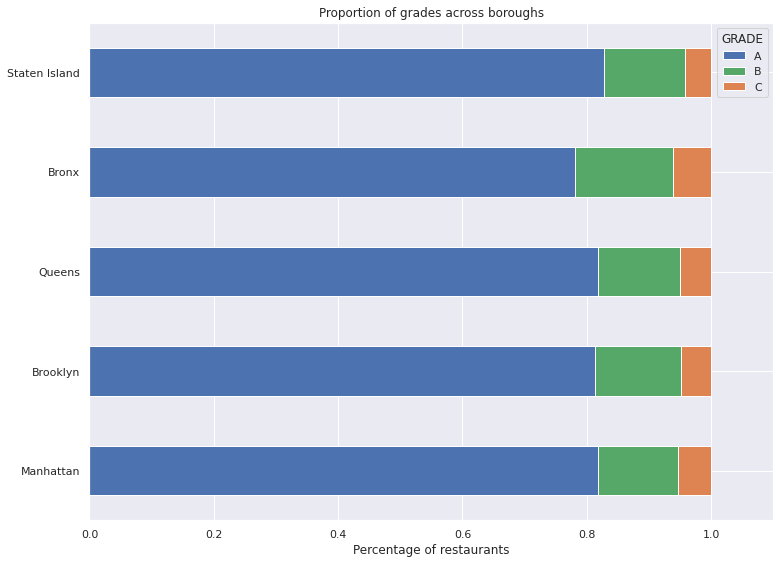

In [18]:
ctdensity.plot(kind='barh', stacked='True', mark_right=True, figsize = (11,8), color = ['b', green, orange])
plt.xlim(0, 1.1)
plt.xlabel('Percentage of restaurants')
plt.ylabel("")
plt.title("Proportion of grades across boroughs")

plt.tight_layout()

# plt.savefig('img/borosproportions.png')
plt.show()

### Numerical Scoring

Let's break down the numerical scoring system as it relates to the grade a restaurant receives. As per official rules:
 * "A" grade: 0 to 13 points for sanitary violations
 * "B" grade: 14 to 27 points for sanitary violations
 * "C" grade: 28 or more points for sanitary violations
 
Violations fall into three categories:
 * Public health hazard: minimum 7 pts
 * Critical violation: minumum 5 pts
 * General violation: minimum 2 pts

In [19]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

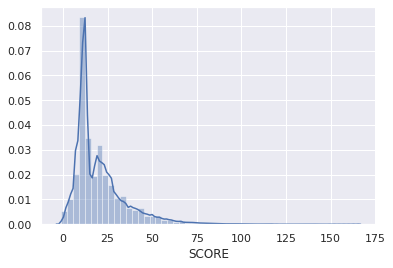

In [20]:
sns.distplot(trim.SCORE.dropna())

This distribution has a very long tail. Let's set a cutoff with a maximum score of 50

In [21]:
trimscore = trim[trim.SCORE <= 50]

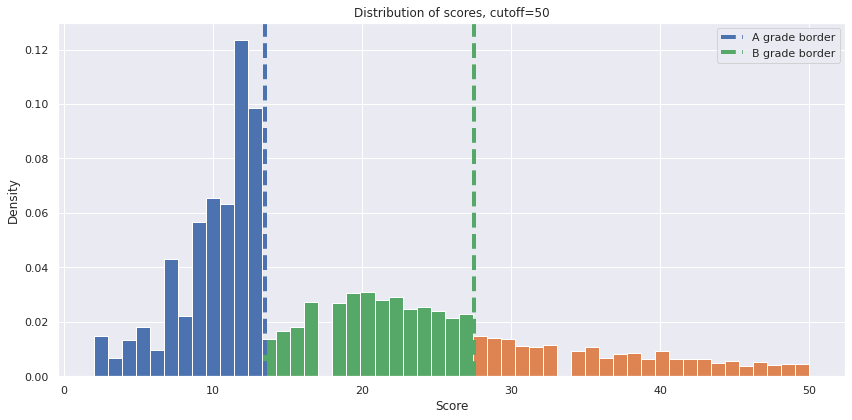

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
N, bins, patches = ax.hist(trimscore.SCORE[trimscore.SCORE> 0], bins = 51, density=True)
ax.axvline(x= 13.5, linestyle='--', linewidth=4, color='b', label='A grade border')
ax.axvline(x= 27.5, linestyle='--', linewidth=4, color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196), label='B grade border')
ax.legend()
ax.set_xlabel('Score')
ax.set_ylabel('Density')
ax.set_title('Distribution of scores, cutoff=50')

for i in range(12,27):
    patches[i].set_facecolor(green)
for i in range(27, 51):
    patches[i].set_facecolor(orange)

plt.tight_layout()

# plt.savefig('img/scoredist.png')
plt.show()


In [23]:
actionclosed = ['Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.', 'Establishment re-closed by DOHMH']

trim[(trim.ACTION.isin(actionclosed))].SCORE.median()

51.0

In [24]:
trim.sort_values(by = 'DBA').head(20)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Census Tract
314824,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-04-11,Violations were cited in the following area(s).,04K,Evidence of rats or live rats present in facil...,Y,11.0,A,04/11/2018,10/25/2020,Cycle Inspection / Re-inspection,40.851256,-73.939519,27300.0
114981,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-04-11,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,11.0,A,04/11/2018,10/25/2020,Cycle Inspection / Re-inspection,40.851256,-73.939519,27300.0
312209,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-09-12,Establishment Closed by DOHMH. Violations wer...,08A,Facility not vermin proof. Harborage or condit...,N,73.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
48223,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-02-01,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,20.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
106430,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-09-12,Establishment Closed by DOHMH. Violations wer...,04K,Evidence of rats or live rats present in facil...,Y,73.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
77532,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-09-12,Establishment Closed by DOHMH. Violations wer...,04H,"Raw, cooked or prepared food is adulterated, c...",Y,73.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
350568,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-09-26,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,2.0,A,09/26/2018,10/25/2020,Cycle Inspection / Re-inspection,40.851256,-73.939519,27300.0
291258,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2019-03-12,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,11.0,A,03/12/2019,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
30175,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-02-01,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Y,20.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0
276184,50050805,#1 Chinese Restaurant,Manhattan,825,WEST 181 STREET,10033.0,Chinese,2018-09-12,Establishment Closed by DOHMH. Violations wer...,05F,Insufficient or no refrigerated or hot holding...,Y,73.0,NaN,NaN,10/25/2020,Cycle Inspection / Initial Inspection,40.851256,-73.939519,27300.0


In [25]:
trim.SCORE.median()

15.0

## Violation types

What are the most common types of violations across the letter grades?

In [26]:
pd.set_option('display.max_colwidth', None)
trim.groupby(['VIOLATION DESCRIPTION']).CAMIS.count().reset_index().sort_values(by='CAMIS', ascending=False).head(7)

,VIOLATION DESCRIPTION,CAMIS
53,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",49746
19,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,38865
17,Evidence of mice or live mice present in facility's food and/or non-food areas.,26133
27,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",23750
32,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",20890
61,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,20524
11,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,19994


In [27]:
conditions = [
    (trim.SCORE < 14),
    (trim.SCORE >= 14) & (trim.SCORE < 28),
    (trim.SCORE >= 28),
    (trim.SCORE.isnull())
]
values = ['A', 'B', 'C', np.NaN]

trim.init_grade = np.select(conditions, values)

/home/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [28]:
trim[trim.SCORE.isnull()]

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Census Tract
53,50063114,PUBLIC ROOF TOP,Manhattan,215,CHRYSTIE ST/PUBLIC ARTS,NaN,American,2018-10-23,Violations were cited in the following area(s).,15F6,NaN,NaN,NaN,NaN,NaN,10/25/2020,Smoke-Free Air Act / Re-inspection,0.000000,0.000000,NaN
54,50010805,CAFE AU LEE,Brooklyn,193,LEE AVENUE,11211.0,Jewish/Kosher,2017-02-16,Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.,20A,Food allergy information poster not conspicuously posted where food is being prepared or processed by food workers.,N,NaN,NaN,NaN,10/25/2020,Administrative Miscellaneous / Re-inspection,40.702160,-73.955956,53300.0
59,50001406,RESERVE CUT,Manhattan,40,BROAD STREET,10004.0,Jewish/Kosher,2018-06-18,Violations were cited in the following area(s).,22C,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",N,NaN,NaN,NaN,10/25/2020,Administrative Miscellaneous / Re-inspection,40.706014,-74.011333,900.0
100,50057811,TEXAS CHICKEN AND BURGERS,Manhattan,1974,2 AVENUE,10029.0,Chicken,2017-01-05,Violations were cited in the following area(s).,16B,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturer’s documentation not maintained on site.",N,NaN,NaN,NaN,10/25/2020,Trans Fat / Initial Inspection,40.787740,-73.944535,16400.0
137,50013768,SUBWAY CAFE,Manhattan,351,WEST 42 STREET,10036.0,Sandwiches,2017-12-06,Violations were cited in the following area(s).,16E,"Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",N,NaN,NaN,NaN,10/25/2020,Calorie Posting / Initial Inspection,40.757841,-73.991229,12100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399892,50017455,NEST RESTAURANT & BAR,Queens,125-17,101 AVENUE,11419.0,Caribbean,2017-05-23,Violations were cited in the following area(s).,15E2,NaN,NaN,NaN,NaN,NaN,10/25/2020,Smoke-Free Air Act / Initial Inspection,40.691461,-73.820692,15400.0
399948,41244032,ESTRELLITA POBLANA # 1,Bronx,22272231,WESTCHESTER AVENUE,NaN,Mexican,2017-02-06,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,N,NaN,NaN,NaN,10/25/2020,Administrative Miscellaneous / Initial Inspection,0.000000,0.000000,NaN
399975,50060943,L'INDUSTRIE PIZZERIA,Brooklyn,254,SOUTH 2 STREET,11211.0,Pizza,2017-03-24,Violations were cited in the following area(s).,22C,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.",N,NaN,NaN,NaN,10/25/2020,Administrative Miscellaneous / Initial Inspection,40.711721,-73.957887,52300.0
400056,41478979,SUBWAY,Manhattan,666,5 AVENUE,10103.0,Sandwiches,2017-07-25,Violations were cited in the following area(s).,16E,"Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",N,NaN,NaN,NaN,10/25/2020,Calorie Posting / Initial Inspection,40.760542,-73.976421,10400.0


In [29]:
trimA = trim[trim.init_grade=='A']
trimB = trim[trim.init_grade=='B']
trimC = trim[trim.init_grade=='C']


In [30]:
trimA.groupby('VIOLATION DESCRIPTION').CAMIS.count().reset_index().sort_values(by='CAMIS', ascending=False).head(10)

,VIOLATION DESCRIPTION,CAMIS
38,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",36152
10,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,15142
15,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",12934
42,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,12334
19,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",10900
8,Evidence of mice or live mice present in facility's food and/or non-food areas.,10175
11,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",7075
5,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,6953
29,Hot food item not held at or above 140º F.,6430
14,Food contact surface not properly maintained.,3952


In [31]:
trimB.groupby('VIOLATION DESCRIPTION').CAMIS.count().reset_index().sort_values(by='CAMIS', ascending=False).head(10)

,VIOLATION DESCRIPTION,CAMIS
10,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,14037
8,Evidence of mice or live mice present in facility's food and/or non-food areas.,10056
39,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",8828
5,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,7847
30,Hot food item not held at or above 140º F.,6992
15,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",6900
11,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",6708
20,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",5620
42,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,4942
35,Live roaches present in facility's food and/or non-food areas.,3046


In [32]:
trimC.groupby('VIOLATION DESCRIPTION').CAMIS.count().reset_index().sort_values(by='CAMIS', ascending=False).head(10)

,VIOLATION DESCRIPTION,CAMIS
11,Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,9686
9,Evidence of mice or live mice present in facility's food and/or non-food areas.,5902
5,Cold food item held above 41º F (smoked fish and reduced oxygen packaged foods above 38 ºF) except during necessary preparation.,5194
12,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facility’s food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",4965
40,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",4766
31,Hot food item not held at or above 140º F.,4459
21,"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",4370
16,"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",3916
43,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly.,3248
36,Live roaches present in facility's food and/or non-food areas.,2441


Not yet sure how to incorporate above.

_______

### Cuisine breakdown:
 * 84 unique "CUISINE DESCRIPTION" values
 * 347k observations. Top 10 cuisines comprise 221k or 64% of all observations

In [33]:
cuisines = trim.groupby('CUISINE DESCRIPTION').CAMIS.count().reset_index().sort_values(by = 'CAMIS', ascending=False)

In [34]:
cuisines.head(10)

,CUISINE DESCRIPTION,CAMIS
2,American,72420
19,Chinese,36856
13,Café/Coffee/Tea,17276
51,"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",15533
62,Pizza,15055
53,Mexican,14342
46,Italian,14037
16,Caribbean,12778
47,Japanese,12408
76,Spanish,10915


In [35]:
cuisines_desc = list(cuisines.head(10)['CUISINE DESCRIPTION'])
cuisines_desc

['American',
 'Chinese',
 'Café/Coffee/Tea',
 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
 'Pizza',
 'Mexican',
 'Italian',
 'Caribbean',
 'Japanese',
 'Spanish']

In [36]:
cuisinegrade = trim[['CUISINE DESCRIPTION', 'GRADE']]

cuisinegrade = cuisinegrade[cuisinegrade['CUISINE DESCRIPTION'].isin(cuisines_desc)]
cuisinegrade = cuisinegrade[cuisinegrade.GRADE.isin(['A', 'B', 'C'])]
cuisinegrade = cuisinegrade.reset_index().drop('index', axis=1)

In [37]:
cuisinegrade

,CUISINE DESCRIPTION,GRADE
0,American,A
1,Pizza,A
2,American,A
3,Japanese,C
4,American,A
...,...,...
109195,Mexican,A
109196,American,A
109197,Chinese,A
109198,Café/Coffee/Tea,A


In [38]:
pd.set_option('display.max_colwidth', 50)
cg = pd.crosstab(cuisinegrade['CUISINE DESCRIPTION'], cuisinegrade.GRADE).sort_values(by='A', ascending=False)
cg

GRADE,A,B,C
CUISINE DESCRIPTION,,,
American,32447,3953,1313
Chinese,13228,3036,1083
Café/Coffee/Tea,8873,685,223
Pizza,6239,983,292
Italian,5705,852,314
Mexican,5301,1122,416
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",4960,1389,520
Japanese,4628,961,303
Caribbean,3861,1097,586


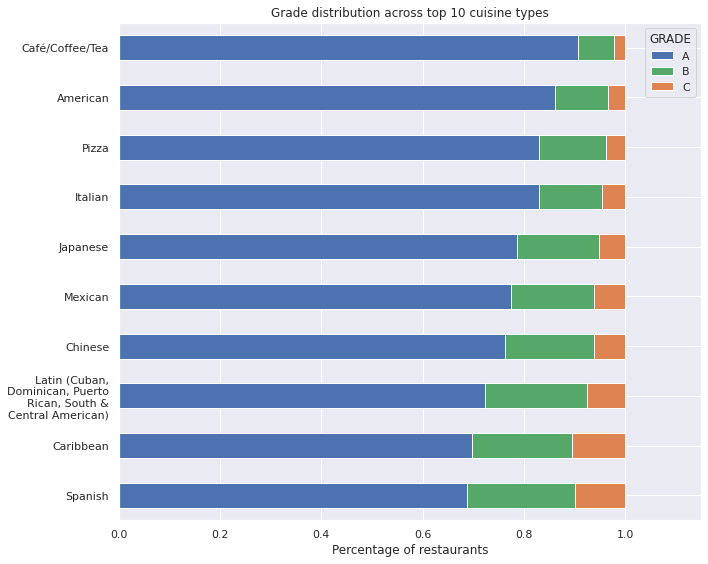

In [39]:
from textwrap import wrap

cgdensity = cg.apply(lambda r: r/r.sum(), axis=1)
cgdensity = cgdensity.sort_values(by='A')
cglabels = list(cgdensity.index)
cglabels = [ '\n'.join(wrap(l, 20)) for l in cglabels ]

cgdensity.plot(kind='barh', stacked='True', mark_right=True, figsize = (10,8), color=['b', green, orange])
plt.yticks(ticks = np.arange(0,10), labels=cglabels)
plt.ylabel('')
plt.xlim(0, 1.15)
plt.xlabel('Percentage of restaurants')
plt.title('Grade distribution across top 10 cuisine types')

plt.tight_layout()
# plt.savefig('img/cuisinegrades.png')
plt.show()